# python based data analysis with `numpy`, `matplotlib`, and `pandas` 

We still need to get the data out of the ROOT file

In [27]:
import ROOT
f = ROOT.TFile('../talk5ReconAnalyzer/50FillCrystalTree.root');
tree = f.Get('CrystalHitTree/crystalTree')

Import required python libraries (all installable with `pip`)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8 # sets default plot size

### `pandas` is a library for data manipulation and analysis. It provides a powerful data structure called a DataFrame; let's get our `ROOT` data into a `pandas` dataframe.

In [34]:
data_rows = []
for entry in tree:
    data_rows.extend(vals for vals in zip(entry.caloNum, entry.xtalNum, entry.fillNum,
                                          entry.islandNum, entry.energy, entry.time))
# create the crystal hit DataFrame
xtal_df = pd.DataFrame(data_rows, columns=['calo num', 'xtal num', 'fill num', 'island num', 'energy', 'time'])
xtal_df.head()

,calo num,xtal num,fill num,island num,energy,time
0,0,25,27,0,38.494636,535.967290
1,0,26,27,0,83.982098,536.244411
2,0,34,27,0,16.655516,535.666283
3,0,35,27,0,1173.304285,536.316324
4,0,33,27,1,80.911042,766.272783


In [30]:
calo_sums=xtal_df.groupby(['calo num', 'fill num', 'island num']).energy.sum()
calo_sums.head()

calo num  fill num  island num
0         1         0             1445.826868
                    1              169.944276
                    2              535.483050
                    3               61.863025
                    4             1072.202038
Name: energy, dtype: float64

Since we only looked at the energy column, we are left with a series of energy sums. We can "unstack" this series to get another dataframe with one column per calo.

In [31]:
calo_sums=calo_sums.unstack(level=0)
calo_sums.head()

calo num                      0            1            2            3   \
fill num island num                                                       
1        0           1445.826868  1636.207371   129.117596   473.821901   
         1            169.944276   233.659789   357.262818  1291.323557   
         2            535.483050  1106.599287  2036.649973  1394.865603   
         3             61.863025   415.910038   728.002052  2198.939603   
         4           1072.202038   871.232183  2838.702463  3521.612404   

calo num                      4            5            6           7   \
fill num island num                                                      
1        0           1242.874041    78.288807   712.774379   93.018414   
         1            149.881939  1193.570659  3608.979571  954.572201   
         2           1406.831190    40.626159   657.055828   70.974054   
         3           1340.444064  3311.976453  2203.570462  215.126815   
         4           1771.283219    80.213856  1829.026447  466.710170   

calo num                      8            9      ...                14  \
fill num island num                               ...                     
1        0           2206.651792   903.174358     ...         72.851192   
         1           2417.985567    73.145261     ...        381.966580   
         2            396.442598  3246.824167     ...       2158.717231   
         3            112.987734  2171.145660     ...       5337.779352   
         4           1378.273960   539.051335     ...       1508.030571   

calo num                      15           16           17           18  \
fill num island num                                                       
1        0           1931.328770   814.452840   910.136433  1766.686804   
         1            276.341565   443.101291  2588.500979  1328.680763   
         2             97.205054  1118.483563  1487.466731  2658.604633   
         3           2021.858960  2154.143714  2652.182764   570.674185   
         4           1141.126467  1653.404227  2485.794542   259.520853   

calo num                      19           20           21           22  \
fill num island num                                                       
1        0           2368.221101  1537.772410  2063.012543   664.558176   
         1           2142.358274  2292.276412  1735.355220  1740.996940   
         2           1531.726671  1706.537761    71.148310   746.969484   
         3           1524.468635   336.429210  1212.258499  2489.855313   
         4           2644.264478  1748.418008   101.446325   767.746943   

calo num                      23  
fill num island num               
1        0            179.715793  
         1            248.157473  
         2           1787.673533  
         3           1417.953273  
         4            513.103800  

[5 rows x 24 columns]

In [32]:
calo_sums.describe()

calo num,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5442.000000,5645.000000,5581.000000,5633.000000,5369.000000,5481.000000,5401.000000,5635.000000,5438.000000,5641.000000,...,5363.000000,5671.000000,5359.000000,5515.000000,5375.000000,5430.000000,5405.000000,5673.000000,5137.000000,5499.000000
mean,1246.596376,1203.877349,1197.037352,1140.120530,1237.231344,1210.077483,1262.966481,1214.286615,1206.420901,1170.711040,...,1174.514375,1172.472170,1224.058528,1255.607847,1250.596975,1195.856846,1193.093091,1150.499649,1274.337913,1301.758408
std,932.965909,926.918602,903.546551,896.626092,908.282420,925.301705,926.945714,923.950363,911.272596,903.938652,...,893.509284,895.537478,911.683336,950.917564,929.574400,910.222314,889.452380,899.529568,917.703064,964.912968
min,35.715204,35.560664,34.806669,35.697469,36.094549,37.000162,35.362435,36.153877,36.192560,34.809021,...,35.707995,35.926179,34.849714,35.828262,35.733049,36.301642,36.421548,35.382707,35.713970,36.322462
25%,438.284667,401.742289,422.324420,355.249630,449.066333,388.492965,465.643750,417.426394,439.248890,378.397961,...,404.326437,378.121461,429.088447,440.049530,453.933010,383.751107,438.498414,343.244318,500.612228,465.389372
50%,1140.590338,1076.088458,1062.333845,1015.014161,1129.547768,1098.008977,1157.000514,1096.945378,1090.152565,1043.543505,...,1047.390062,1049.804716,1122.614154,1130.994776,1145.316486,1092.644595,1080.329766,1023.645830,1177.391259,1195.549853
75%,1889.650509,1815.150579,1812.318261,1722.822582,1870.148692,1839.138096,1884.908768,1824.145637,1821.219190,1784.920284,...,1777.268618,1793.294171,1842.766650,1881.656419,1870.094696,1818.276172,1807.245223,1764.173427,1899.503746,1938.907410
max,7963.476749,8183.422092,6604.759555,8158.578694,6361.535186,6493.050479,7658.865215,6733.285337,6480.976585,5895.404356,...,6220.423313,8427.534161,7825.170284,7522.803097,6378.103676,6501.622008,7203.099968,5756.550708,7737.637816,7281.636734


(0, 250)

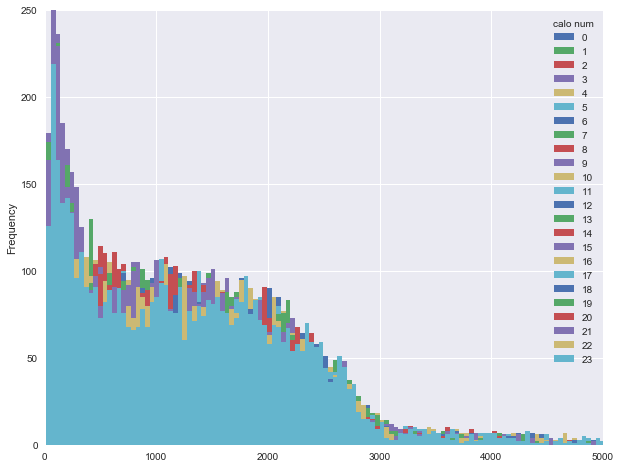

In [7]:
a = calo_sums.plot.hist(bins=200)
a.set_xlim([0,5000])
a.set_ylim([0,250])

Similarly, we can plot for each crystal like we did in root. These plots will be over all calos.

In [8]:
xtal_tab = xtal_df.pivot_table(index=['calo num', 'fill num', 'island num'],
                               columns='xtal num', values='energy')
xtal_tab.head()

xtal num                      0           1           2          3   4   5   \
calo num fill num island num                                                  
0        1        0          NaN         NaN         NaN        NaN NaN NaN   
                  1          NaN         NaN         NaN        NaN NaN NaN   
                  2          NaN         NaN         NaN        NaN NaN NaN   
                  3          NaN         NaN         NaN        NaN NaN NaN   
                  4          NaN  119.674003  246.062199  32.200213 NaN NaN   

xtal num                      6   7   8          9  ...  44  45  46  47  48  \
calo num fill num island num                        ...                       
0        1        0          NaN NaN NaN        NaN ... NaN NaN NaN NaN NaN   
                  1          NaN NaN NaN        NaN ... NaN NaN NaN NaN NaN   
                  2          NaN NaN NaN        NaN ... NaN NaN NaN NaN NaN   
                  3          NaN NaN NaN        NaN ... NaN NaN NaN NaN NaN   
                  4          NaN NaN NaN  15.599238 ... NaN NaN NaN NaN NaN   

xtal num                      49  50  51  52  53  
calo num fill num island num                      
0        1        0          NaN NaN NaN NaN NaN  
                  1          NaN NaN NaN NaN NaN  
                  2          NaN NaN NaN NaN NaN  
                  3          NaN NaN NaN NaN NaN  
                  4          NaN NaN NaN NaN NaN  

[5 rows x 54 columns]

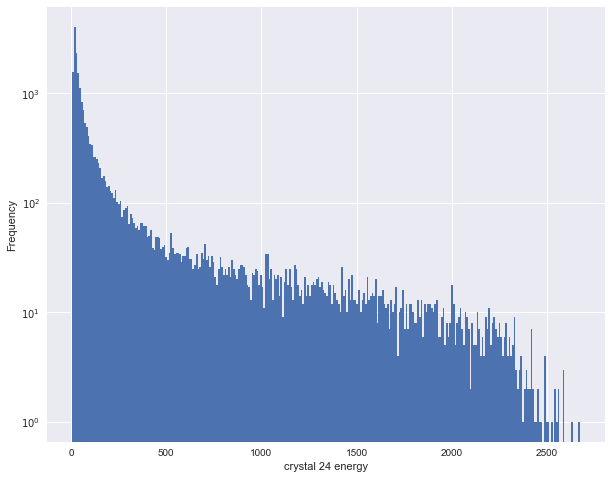

In [9]:
def draw_xtal_dist(xtal_num):
    xtal_tab[xtal_num].plot.hist(bins=300, logy=True)

plt.xlabel('crystal 24 energy')
draw_xtal_dist(24)

We can also look at the energy deposition correlation between two neighboring crystals.

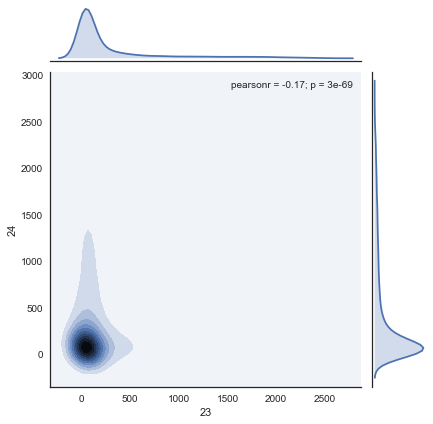

In [10]:
sns.set_style('white')
plt.rcParams['figure.figsize'] = 10, 10 
sns.jointplot(x=23, y=24, data=xtal_tab, kind='kde')

## Let's look at some times as well, and see if we can make a wiggle plot

In [11]:
# add time into the xtal table
xtal_tab = xtal_df.pivot_table(index=['calo num', 'fill num', 'island num'],
                               columns='xtal num', values=['energy', 'time'])
xtal_tab.head()

energy                                         \
xtal num                         0           1           2          3   4    
calo num fill num island num                                                 
0        1        0             NaN         NaN         NaN        NaN NaN   
                  1             NaN         NaN         NaN        NaN NaN   
                  2             NaN         NaN         NaN        NaN NaN   
                  3             NaN         NaN         NaN        NaN NaN   
                  4             NaN  119.674003  246.062199  32.200213 NaN   

                                                        ... time              \
xtal num                      5   6   7   8          9  ...   44  45  46  47   
calo num fill num island num                            ...                    
0        1        0          NaN NaN NaN NaN        NaN ...  NaN NaN NaN NaN   
                  1          NaN NaN NaN NaN        NaN ...  NaN NaN NaN NaN   
                  2          NaN NaN NaN NaN        NaN ...  NaN NaN NaN NaN   
                  3          NaN NaN NaN NaN        NaN ...  NaN NaN NaN NaN   
                  4          NaN NaN NaN NaN  15.599238 ...  NaN NaN NaN NaN   

                                                      
xtal num                      48  49  50  51  52  53  
calo num fill num island num                          
0        1        0          NaN NaN NaN NaN NaN NaN  
                  1          NaN NaN NaN NaN NaN NaN  
                  2          NaN NaN NaN NaN NaN NaN  
                  3          NaN NaN NaN NaN NaN NaN  
                  4          NaN NaN NaN NaN NaN NaN  

[5 rows x 108 columns]

In [12]:
# calculate energy weighted time and cluster sum
island_sums = xtal_tab.energy.sum('columns')
e_weight_t = (xtal_tab['energy']*xtal_tab['time']).sum('columns')/island_sums
# make data frame with the summary info, basically clusters
summary_frame = pd.DataFrame({'energy' : island_sums, 'time':e_weight_t})
summary_frame.head()

energy         time
calo num fill num island num                          
0        1        0           1445.826868    18.411115
                  1            169.944276   938.422097
                  2            535.483050  1833.775504
                  3             61.863025  3716.604533
                  4           1072.202038  3771.311450

(0, 50000)

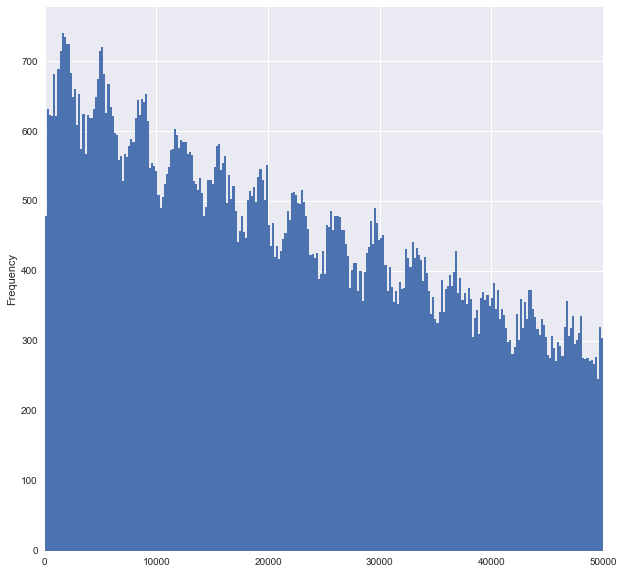

In [13]:
sns.set_style('darkgrid')
summary_frame.time.plot.hist(bins=300)
plt.xlim(0,50000)

Select events with energy > 1.8 GeV, and make the plot

(0, 50000)

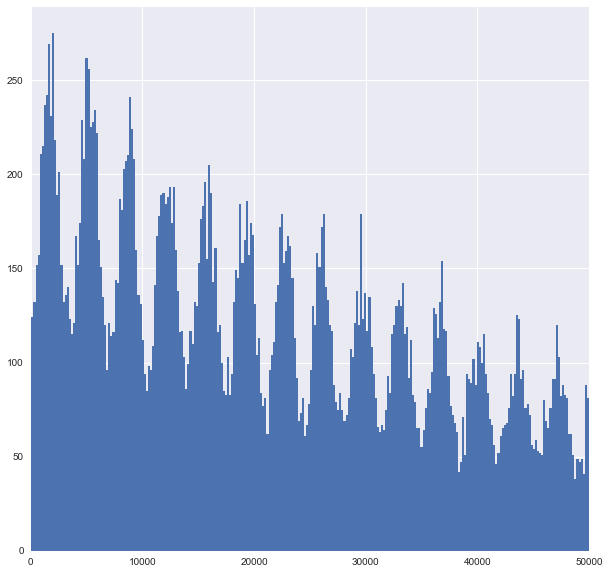

In [14]:
sns.set_style('darkgrid')
summary_frame.loc[summary_frame.energy > 1800, 'time'].hist(bins=300)
plt.xlim(0,50000)

We could also try a Q-method histogram

(0, 50000)

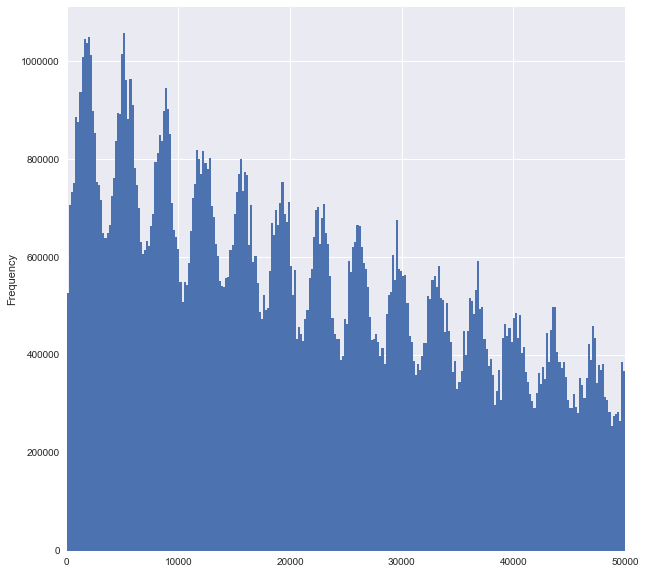

In [15]:
summary_frame.time.plot.hist(bins=300, weights=summary_frame.energy)
plt.xlim(0,50000)

## Let's try applying position reconstruction algorithm and looking at hit positions

In [16]:
# remind ourselves what this looks like
xtal_df.head()

,calo num,xtal num,fill num,island num,energy,time
0,0,25,27,0,38.494636,535.967290
1,0,26,27,0,83.982098,536.244411
2,0,34,27,0,16.655516,535.666283
3,0,35,27,0,1173.304285,536.316324
4,0,33,27,1,80.911042,766.272783


In [17]:
# add columnss for x and y xtal central positions
xtal_df['x'] = 8.5 - xtal_df['xtal num'] % 9
xtal_df['y'] = xtal_df['xtal num'] // 9 + 0.5
xtal_df.head()

,calo num,xtal num,fill num,island num,energy,time,x,y
0,0,25,27,0,38.494636,535.967290,1.5,2.5
1,0,26,27,0,83.982098,536.244411,0.5,2.5
2,0,34,27,0,16.655516,535.666283,1.5,3.5
3,0,35,27,0,1173.304285,536.316324,0.5,3.5
4,0,33,27,1,80.911042,766.272783,2.5,3.5


In [18]:
# add column for island energy sum
xtal_df['island sum'] = xtal_df.groupby(['calo num', 'fill num', 'island num']).energy.transform('sum')
xtal_df.head()

,calo num,xtal num,fill num,island num,energy,time,x,y,island sum
0,0,25,27,0,38.494636,535.967290,1.5,2.5,1312.436535
1,0,26,27,0,83.982098,536.244411,0.5,2.5,1312.436535
2,0,34,27,0,16.655516,535.666283,1.5,3.5,1312.436535
3,0,35,27,0,1173.304285,536.316324,0.5,3.5,1312.436535
4,0,33,27,1,80.911042,766.272783,2.5,3.5,1027.796713


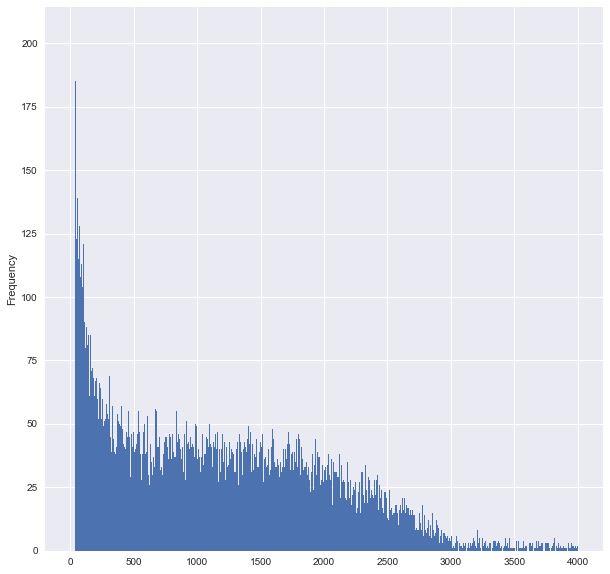

In [19]:
# make sure that the sum looks reasonable
grouped_by_island=xtal_df.groupby(['calo num', 'fill num', 'island num'])
grouped_by_island.first()['island sum'].plot.hist(bins=200*24, range=[0,4000])

# In logarithmic weighting technique, $w_i = max(0, w_0 + log(E_i / E_{sum})$

In [20]:
w0 = 4.0
xtal_df['weight']=np.maximum(0, w0 + np.log(xtal_df.energy / xtal_df['island sum']))
xtal_df['wsum'] = grouped_by_island['weight'].transform('sum')
xtal_df.head()

,calo num,xtal num,fill num,island num,energy,time,x,y,island sum,weight,wsum
0,0,25,27,0,38.494636,535.967290,1.5,2.5,1312.436535,0.470878,5.609780
1,0,26,27,0,83.982098,536.244411,0.5,2.5,1312.436535,1.250963,5.609780
2,0,34,27,0,16.655516,535.666283,1.5,3.5,1312.436535,0.000000,5.609780
3,0,35,27,0,1173.304285,536.316324,0.5,3.5,1312.436535,3.887939,5.609780
4,0,33,27,1,80.911042,766.272783,2.5,3.5,1027.796713,1.458178,9.297929


# Calculate x and y positions using $x/y = \sum\limits_{islands} \frac{x_i/y_i \cdot w_i}{w_{sum}}$

In [21]:
xtal_df['wTimesX'] = xtal_df.weight * xtal_df.x
xtal_df['sumWX'] = grouped_by_island.wTimesX.transform('sum')
xtal_df['wTimesY'] = xtal_df.weight * xtal_df.y
xtal_df['sumWY'] = grouped_by_island.wTimesY.transform('sum')
# now that we have wsum and xi wi sum for all islands, we can drop redundant rows
recon_frame = xtal_df.groupby(['calo num', 'fill num', 'island num']).first()[['island sum', 'wsum', 'sumWX', 'sumWY']]
recon_frame.head()

island sum       wsum      sumWX      sumWY
calo num fill num island num                                              
0        1        0           1445.826868   6.355253  32.613737  15.343856
                  1            169.944276   5.753566   6.640109  16.265579
                  2            535.483050  12.019608  26.052715  29.933750
                  3             61.863025   4.000000   2.000000  10.000000
                  4           1072.202038  11.888654  79.414332  13.003062

In [22]:
# calculate reconstructed positions
recon_frame['x'] = recon_frame.sumWX / recon_frame.wsum
recon_frame['y'] = recon_frame.sumWY / recon_frame.wsum

# rename island sum column to energy
recon_frame.columns = ['energy'] + list(recon_frame.columns[1:])

# copy summary information into new data frame
recon_frame.head()

energy       wsum      sumWX      sumWY  \
calo num fill num island num                                                 
0        1        0           1445.826868   6.355253  32.613737  15.343856   
                  1            169.944276   5.753566   6.640109  16.265579   
                  2            535.483050  12.019608  26.052715  29.933750   
                  3             61.863025   4.000000   2.000000  10.000000   
                  4           1072.202038  11.888654  79.414332  13.003062   

                                     x         y  
calo num fill num island num                      
0        1        0           5.131776  2.414358  
                  1           1.154086  2.827043  
                  2           2.167518  2.490410  
                  3           0.500000  2.500000  
                  4           6.679842  1.093737

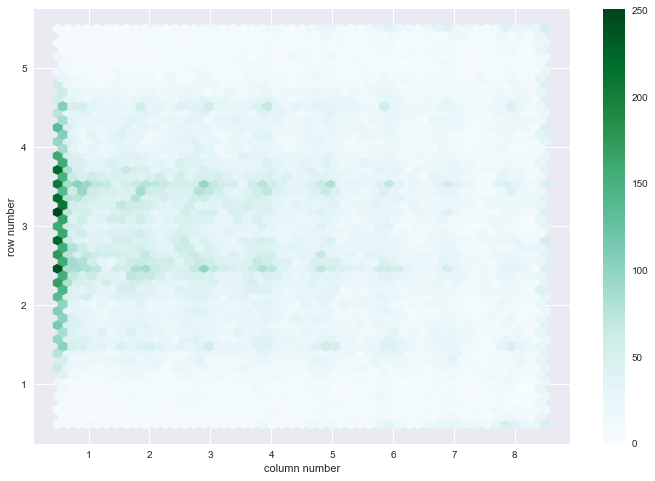

In [23]:
plt.rcParams['figure.figsize'] = 12, 8 # sets default plot size
recon_frame.query('energy > 1000').plot.hexbin(x='x', y='y', gridsize=50, sharex=False)
plt.xlabel('column number')
plt.ylabel('row number')

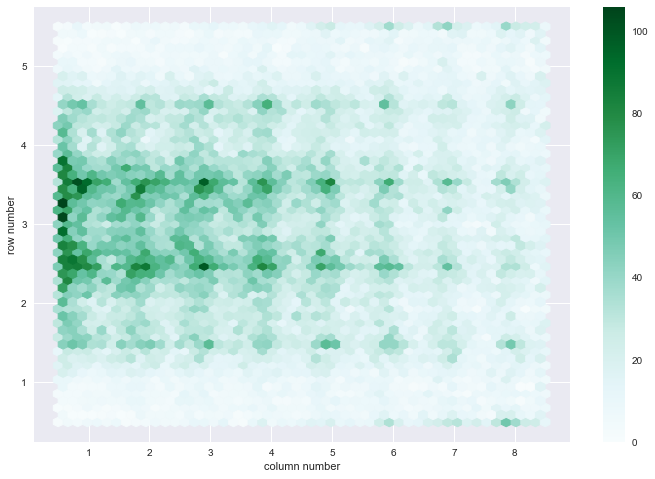

In [26]:
# seems dominated by edge impace, let's cut those out
recon_frame.query('x > 0.5 & x < 8.5 & energy > 1000').plot.hexbin(x='x', y='y', gridsize=50, sharex=False)
plt.xlabel('column number')
plt.ylabel('row number') 

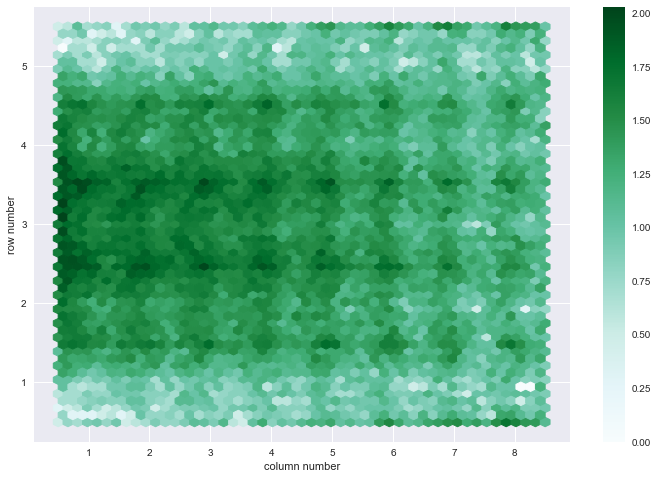

In [25]:
# log scale
fig = recon_frame.query('energy > 1000 & x > 0.5 & x < 8.5').plot.hexbin(x='x', y='y', bins='log', 
                                                                         gridsize=50, sharex=False)
plt.xlabel('column number')
plt.ylabel('row number')